<a href="https://colab.research.google.com/github/chohyungrae/-Artificial-Intelligence-and-Image-Learning-/blob/master/custom_learningtopaint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICCV2019-Learning to Paint

## [Arxiv](https://arxiv.org/abs/1903.04411) | [YouTube](https://youtu.be/YmOgKZ5oipk) | [Reddit](https://www.reddit.com/r/reinforcementlearning/comments/b5lpfl/learning_to_paint_with_modelbased_deep/)

## Abstract

We show how to teach machines to paint like human painters, who can use a
small number of strokes to create fantastic paintings. By employing a neural
renderer in model-based Deep Reinforcement Learning (DRL), our agents learn to
determine the position and color of each stroke and make long-term plans to
decompose texture-rich images into strokes. Experiments demonstrate that
excellent visual effects can be achieved using hundreds of strokes. The
training process does not require the experience of human painters or stroke
tracking data.

* Our ICCV poster
  <div>
<a target="_blank" rel="noopener noreferrer" href="https://github.com/hzwer/ICCV2019-LearningToPaint/blob/master/demo/lisa.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/lisa.gif" alt="Demo" style="max-width:100%;"></a><a target="_blank" rel="noopener noreferrer" href="/hzwer/ICCV2019-LearningToPaint/blob/master/demo/sunrise.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/sunrise.gif" alt="Demo" style="max-width:100%;"></a><a target="_blank" rel="noopener noreferrer" href="/hzwer/ICCV2019-LearningToPaint/blob/master/demo/sunflower.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/sunflower.gif" alt="Demo" style="max-width:100%;"></a>
<a target="_blank" rel="noopener noreferrer" href="/hzwer/ICCV2019-LearningToPaint/blob/master/demo/palacemuseum.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/palacemuseum.gif" alt="Demo" style="max-width:100%;"></a><a target="_blank" rel="noopener noreferrer" href="https://github.com/hzwer/ICCV2019-LearningToPaint/blob/master/demo/deepdream_night.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/deepdream_night.gif" alt="Demo" style="max-width:100%;"></a><a target="_blank" rel="noopener noreferrer" href="/hzwer/ICCV2019-LearningToPaint/blob/master/demo/deepdream_bird.gif"><img src="https://github.com/hzwer/ICCV2019-LearningToPaint/raw/master/demo/deepdream_bird.gif" alt="Demo" style="max-width:100%;"></a>
</div>

>Colab customized by [mrm8488](https://twitter.com/mrm8488)

# 1. Clone the project

In [ ]:
!git clone https://github.com/hzwer/LearningToPaint.git

Cloning into 'LearningToPaint'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 429 (delta 12), reused 12 (delta 4), pack-reused 404
Receiving objects: 100% (429/429), 18.65 MiB | 8.54 MiB/s, done.
Resolving deltas: 100% (228/228), done.


In [ ]:
cd LearningToPaint/

/content/LearningToPaint


In [ ]:
!mkdir uploaded_images

# 2. Download the renderer and the actor

In [ ]:
#@title Choose a stroke pattern (renderer/actor)

option = 'Round' #@param ["Default", "Triangle", "Round", "Bezierwotrans"]
print(option)

Round


In [ ]:
urls = {
    "Default" : {"renderer": "https://drive.google.com/uc?export=download&id=1-7dVdjCIZIxh8hHJnGTK-RA1-jL1tor4", "actor": "https://drive.google.com/uc?export=download&id=1a3vpKgjCVXHON4P7wodqhCgCMPgg1KeR" },
		"Triangle" : {"renderer": "https://drive.google.com/uc?authuser=0&id=1YefdnTuKlvowCCo1zxHTwVJ2GlBme_eE&export=download", "actor": "https://drive.google.com/uc?authuser=0&id=1k8cgh3tF7hKFk-IOZrgsUwlTVE3CbcPF&export=download" },
		"Round" : {"renderer": "https://drive.google.com/uc?authuser=0&id=1kI4yXQ7IrNTfjFs2VL7IBBL_JJwkW6rl&export=download", "actor": "https://drive.google.com/uc?authuser=0&id=1ewDErUhPeGsEcH8E5a2QAcUBECeaUTZe&export=download" },
		"Bezierwotrans" : {"renderer": "https://drive.google.com/uc?authuser=0&id=1XUdti00mPRh1-1iU66Uqg4qyMKk4OL19&export=download", "actor": "https://drive.google.com/uc?authuser=0&id=1VBtesw2rHmYu2AeJ22XvTCuzuqkY8hZh&export=download" }
}

renderer_url = urls[option]["renderer"]
print(renderer_url)
actor_url = urls[option]["actor"]
print(actor_url)

https://drive.google.com/uc?authuser=0&id=1kI4yXQ7IrNTfjFs2VL7IBBL_JJwkW6rl&export=download
https://drive.google.com/uc?authuser=0&id=1ewDErUhPeGsEcH8E5a2QAcUBECeaUTZe&export=download


In [ ]:
!wget "$renderer_url" -O renderer.pkl

--2020-08-07 21:42:10--  https://drive.google.com/uc?authuser=0&id=1kI4yXQ7IrNTfjFs2VL7IBBL_JJwkW6rl&export=download
Resolving drive.google.com (drive.google.com)... 74.125.203.100, 74.125.203.101, 74.125.203.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.203.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/uc?id=1kI4yXQ7IrNTfjFs2VL7IBBL_JJwkW6rl&export=download [following]
--2020-08-07 21:42:10--  https://drive.google.com/uc?id=1kI4yXQ7IrNTfjFs2VL7IBBL_JJwkW6rl&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bv32dbpph3kp8jjevba5vnpuivmgo83v/1596836475000/10102393604162075786/*/1kI4yXQ7IrNTfjFs2VL7IBBL_JJwkW6rl?e=download [following]
--2020-08-07 21:42:13--  https://doc-0c-58-docs.googleusercontent.com/docs/securesc

In [ ]:
!wget "$actor_url" -O actor.pkl

--2020-08-07 21:42:18--  https://drive.google.com/uc?authuser=0&id=1ewDErUhPeGsEcH8E5a2QAcUBECeaUTZe&export=download
Resolving drive.google.com (drive.google.com)... 74.125.203.139, 74.125.203.102, 74.125.203.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.203.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/uc?id=1ewDErUhPeGsEcH8E5a2QAcUBECeaUTZe&export=download [following]
--2020-08-07 21:42:19--  https://drive.google.com/uc?id=1ewDErUhPeGsEcH8E5a2QAcUBECeaUTZe&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-58-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/duc2g9he97up6fviukdmidkfn5bha9kf/1596836475000/10102393604162075786/*/1ewDErUhPeGsEcH8E5a2QAcUBECeaUTZe?e=download [following]
--2020-08-07 21:42:22--  https://doc-00-58-docs.googleusercontent.com/docs/securesc

In [ ]:
from google.colab import files

<a id='start'></a>

# 3. Remove existing files and upload ours one

In [ ]:
!rm -rf ./output/*
![ -e video.mp4 ] && rm video.mp4

In [ ]:
uploaded = files.upload()
pic_name = list(uploaded.keys())[0]
print(pic_name)
!mv ./$pic_name ./uploaded_images/$pic_name

Saving mauritshuis.jpg to mauritshuis.jpg
mauritshuis.jpg


# 4. Create the painting's strokes
PS: It can take a while

In [ ]:
!python3 baseline/test.py --max_step=80 --actor=actor.pkl --renderer=renderer.pkl --img=uploaded_images/$pic_name --divide=5

baseline/test.py:51: UserWarning: Mixed memory format inputs detected while calling the operator. The operator will output contiguous tensor even if some of the inputs are in channels_last format. (Triggered internally at  /pytorch/aten/src/ATen/native/TensorIterator.cpp:918.)
  canvas = canvas * (1 - stroke[:, i]) + color_stroke[:, i]
canvas step 0, L2Loss = 0.02140125446021557
canvas step 1, L2Loss = 0.017573779448866844
canvas step 2, L2Loss = 0.014851623214781284
canvas step 3, L2Loss = 0.012031939812004566
canvas step 4, L2Loss = 0.010934796184301376
canvas step 5, L2Loss = 0.00983356311917305
canvas step 6, L2Loss = 0.009333751164376736
canvas step 7, L2Loss = 0.008812184445559978
canvas step 8, L2Loss = 0.008301547728478909
canvas step 9, L2Loss = 0.007884852588176727
canvas step 10, L2Loss = 0.007470095995813608
canvas step 11, L2Loss = 0.007195606362074614
canvas step 12, L2Loss = 0.006960092578083277
canvas step 13, L2Loss = 0.006617849692702293
canvas step 14, L2Loss = 0.006

# 5. Convert it to video

In [ ]:
!ffmpeg -r 30 -f image2 -i output/generated%d.png -s 512x512 -c:v libx264 -pix_fmt yuv420p video.mp4 -q:v 0 -q:a 0

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

# 6. Watch the video generated

In [ ]:
from IPython.display import display, Image
import moviepy.editor as mpy
display(mpy.ipython_display('video.mp4', height=256, max_duration=100.))

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)679936/45929032 bytes (1.5%)1892352/45929032 bytes (4.1%)3645440/45929032 bytes (7.9%)6070272/45929032 bytes (13.2%)9363456/45929032 bytes (20.4%)12689408/45929032 bytes (27.6%)16154624/45929032 bytes (35.2%)19587072/45929032 bytes (42.6%)22831104/45929032 bytes (49.7%)26492928/45929032 bytes (57.7%)30056448/45929032 bytes (65.4%)33447936/45929032 bytes (72.8%)37003264/

# 6.b. Watch the final picture

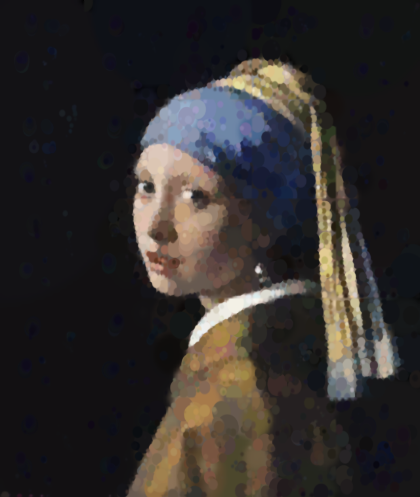

In [ ]:
display(Image('output/generated399.png'))

# 7. Download it!

In [ ]:
files.download("./video.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("output/generated399.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### If you want to try with another picture go to step 3 or if you wanna try with another stroke pattern (round, triangle, etc) start from step 2

 Did you enjoy? Buy me a coffe :)
 
[![ko-fi](https://www.ko-fi.com/img/githubbutton_sm.svg)](https://ko-fi.com/Y8Y3VYYE)